In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import requests
from matplotlib import rcParams
import os
#import plotly.graph_objects as go
#import plotly.express as px
#from plotly.subplots import make_subplots
import json
from matplotlib import rcParams
import numpy as np

import sys
sys.path.append("C:/Users/eric_/OneDrive/Bureau/Projects/MGC/")

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
def col_proportion(dataframe,col,max_occurences = 15):
    temp = (pd.DataFrame(
            dataframe[col].value_counts())
           )
    if isinstance(col,list):
        temp.rename(columns={0:'count'},inplace=True)
        if ('NA','NA') in temp.index:
            print(f"There are {'{:.1%}'.format(temp.loc[('NA','NA'),'count']/temp['count'].sum())} missing values")
            temp.drop(index=('NA','NA'),inplace=True)
        temp['proportion'] = temp['count']/temp['count'].sum()
        temp = temp.head(max_occurences)
        temp = temp.style.format({'proportion': "{:.1%}"}).bar(subset='count',width = 80,vmin=0)
    else:
        if 'NA' in temp.index:
            print(f"There are {'{:.1%}'.format(temp.loc['NA',col]/temp[col].sum())} missing values")
            temp.drop(index='NA',inplace=True)
        temp ['proportion'] = temp[col]/temp[col].sum()
        temp = temp.head(max_occurences)
        temp = temp.style.format({'proportion': "{:.1%}"}).bar(subset=col,width = 80,vmin=0)
    return temp

In [9]:
data = pd.read_csv("api_transaction.csv")

In [10]:
data.lastTransitionedAt = pd.to_datetime(data.lastTransitionedAt)

In [8]:
transition/enquire                          1282
transition/complete                          188
transition/expire-review-period              152
transition/decline                            88
transition/expire                             60
transition/cancel                             47
transition/review-2-by-customer               38
transition/expire-payment                     27
transition/review-1-by-provider               26
transition/review-2-by-provider               24
transition/accept                             23
transition/request-payment                    17
transition/expire-customer-review-period      17
transition/review-1-by-customer               14
transition/expire-provider-review-period      10
transition/request-payment-after-enquiry       6
transition/confirm-payment                     2

SyntaxError: invalid syntax (<ipython-input-8-824906565bb1>, line 1)

In [11]:
def map_transaction(x):
    if x in ['transition/complete','transition/review-2-by-customer',
             'transition/review-1-by-provider','transition/review-2-by-provider',
             'transition/review-1-by-customer','transition/expire-review-period',
             'transition/expire-provider-review-period','transition/expire-customer-review-period',
             'transition/accept'
            ]:
        return 1
    else : 
        return 0

In [12]:
data['istransaction'] = data.lastTransition.apply(lambda x : map_transaction(x))

In [39]:
transac_by_date = data.groupby(pd.Grouper(key='lastTransitionedAt',freq='m')).sum()['istransaction']
transac_by_date = pd.DataFrame(transac_by_date).reset_index()

Text(0.5, 1.0, 'Transaction Per Month')

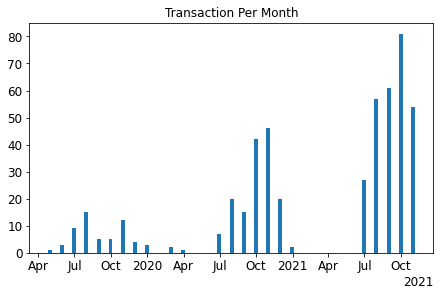

In [51]:
fig, ax = plt.subplots(constrained_layout=True)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
#formatter = mdates.AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.bar(transac_by_date.lastTransitionedAt,transac_by_date.istransaction, width = 10)
ax.set_title('Transaction Per Month')

NameError: name 'matplotlib' is not defined

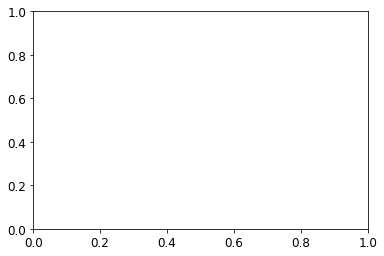

In [26]:
fig, ax = plt.subplots()
matplotlib.dates.MonthLocator()
data.groupby(pd.Grouper(key='lastTransitionedAt',freq='m')).sum()['istransaction'].plot(kind='bar')
#y_labels = ax.get_yticks()
#ax.xaxis.set_major_formatter(ticker.dates.ConciseDateFormatter('%Y-%b'))

In [12]:
data['month_transition'] = data.lastTransitionedAt.dt.month
data['year_transition'] = data.lastTransitionedAt.dt.year
data['day_transition'] = data.lastTransitionedAt.dt.day

In [15]:
data.groupby(["year_transition","month_transition",'day_transition']).count()['id'].tail(50)

year_transition  month_transition  day_transition
2021             8                 24                13
                                   25                19
                                   26                16
                                   27                 5
                                   28                 4
                                   29                 5
                                   30                16
                                   31                 9
                 9                 1                  9
                                   2                  5
                                   3                  8
                                   4                  4
                                   5                  8
                                   6                 12
                                   7                  4
                                   8                 10
                                   9                 1

In [17]:
listings = pd.read_csv("api_listing.csv")

In [19]:
transac_listing = data.merge(listings,how='left',left_on = 'listing_id',right_on = 'id',suffixes=('_transac','_listings'))

In [22]:
profiles = pd.read_csv("api_profile.csv")

In [32]:
full_data_transac = transac_listing.merge(profiles,how='left',left_on = 'author_id',right_on='id').merge(profiles,how='left',left_on = 'customer_id',right_on='id',suffixes=('_prop','_loc'))

In [33]:
full_data_w_transaction = full_data_transac[full_data_transac.istransaction == 1]

In [27]:
full_data_w_transaction.groupby(['first_name_prop','last_name_prop','title']).count()['id_transac'].sort_values(ascending=False).head(40)

first_name_prop  last_name_prop  title                                                   
Madeleine        Ispari          Elegante capeline                                           23
Amélie           de Champs       Très belle Capeline les petites mésanges! Hortensias        14
Maïlys           Lanata          Chapeau - Capeline en paille                                 7
Madeleine        Ispari          Robe Jane Maison Guillemette TS                              7
Amélie           de Champs       Escarpins sezane high Palermo T39                            6
Coralie          LEBIGOT         Robe Erell Fleuri multico - T36                              5
Amélie           de Champs       Magnifique robe Bash Maddie Bleu T1                          5
Mayane           Cayla           Capeline paille                                              4
Maguelonne       Lecointre       Chapeau les petites mésanges                                 4
Anne-Cécile      HULOT           Chapeau Canne

In [28]:
full_data_w_transaction['month_joined'] = full_data_w_transaction.lastTransitionedAt.dt.month
full_data_w_transaction['year_joined'] = full_data_w_transaction.lastTransitionedAt.dt.year

C:\Users\eric_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\eric_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
full_data_w_transaction['city']=full_data_w_transaction['address'].apply(lambda x : x.split(",")[-3] if len(x.split(","))>2 else '')

C:\Users\eric_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
full_data_w_transaction.groupby(['city']).count()['id_transac'].sort_values(ascending=False).head(40)

city
                                      130
 Paris                                 54
 75015 Paris                           48
 75116 Paris                           47
 75005 Paris                           14
 75017 Paris                           12
 75012 Paris                           10
 75003 Paris                            9
 Hauts-de-Seine                         8
 75007 Paris                            8
 75009 Paris                            8
 75016 Paris                            8
 44300 Nantes                           8
 Yvelines                               7
 75006 Paris                            7
 78220 Viroflay                         7
 92300 Levallois-Perret                 7
 92100 Boulogne-Billancourt             6
 49100 Angers                           5
 75013 Paris                            4
 60270 Gouvieux                         4
 51270 Baye                             4
 69006 Lyon                             4
 Hauts-de-Seine 92200        

In [31]:
full_data_w_transaction

,id_transac,state_transac,process,createdAt_transac,lastTransition,lastTransitionedAt,lineItems,payIns,payOuts,protectedData,...,avatar_loc,bio_loc,email_loc,emailVerified_loc,phoneNumber_loc,wishlist_loc,stripeAccount_id_loc,month_joined,year_joined,city
3,0127377a-355b-4f82-9d64-8d4361b8080e,delivered,mygoldencloset/beta,2021-10-07 18:27:09.050819+00,transition/complete,2021-10-07 22:00:05.615969+00:00,"[{""code"": ""line-item/units"", ""seats"": null, ""u...","[{""id"": ""be9d0d34-a3a0-4b40-a184-f49b17c430be""...","[{""id"": ""76a37d8d-267c-441b-8e86-3647360bf3d8""...","{""~:stripePaymentIntents"": {""~:default"": {""~:s...",...,2027c305-1664-46a2-afc0-13b76f136058,NaN,jeanne.rdeseresin@gmail.com,True,0662688736,{79017cbb-4846-4972-a2e3-e757b7a7f516},e08490be-4739-45bf-a8d5-90b81c533c44,10,2021,Yvelines
4,013066d4-0018-4277-8976-9bcb0dbdcf35,delivered,mygoldencloset/beta,2021-10-04 13:52:02.575079+00,transition/complete,2021-10-05 14:00:09.332769+00:00,"[{""code"": ""line-item/units"", ""seats"": null, ""u...","[{""id"": ""6fa7070e-f203-4781-b79c-ca2403abd0ff""...","[{""id"": ""ce1ca264-eb4c-4b3b-8952-2ae07c141cd3""...","{""~:stripePaymentIntents"": {""~:default"": {""~:s...",...,NaN,NaN,berengere.jouve@orange.fr,True,0670104824,"{5f3815d9-8589-4a49-bda6-573a88025aac,5cabc08f...",4e255b87-28e8-4862-b658-3ec30850f6cd,10,2021,75015
9,01fef9fd-65c9-4b94-8100-d79068177a06,delivered,mygoldencloset/beta,2021-06-09 09:08:22.204028+00,transition/complete,2021-06-17 14:35:14.991245+00:00,"[{""code"": ""line-item/units"", ""seats"": null, ""u...","[{""id"": ""c45e192a-666d-4bb6-8b6e-f41d5200542f""...","[{""id"": ""2240cedf-5ac1-4d41-9eb3-a46e4496d90a""...","{""~:stripePaymentIntents"": {""~:default"": {""~:s...",...,NaN,NaN,tsr.celine@yahoo.fr,True,NaN,{a2c150d7-a89d-47e2-aa90-694ba64bb779},NaN,6,2021,
10,0298089f-e951-4763-98c8-131d1badd01d,delivered,mygoldencloset/beta,2021-08-04 16:23:56.879049+00,transition/complete,2021-08-04 18:00:04.755865+00:00,"[{""code"": ""line-item/units"", ""seats"": null, ""u...","[{""id"": ""1e833ffe-fbfb-4585-9eaf-c3dce8cb37ef""...","[{""id"": ""7e6642d6-c5c4-4dbb-bf63-47676c465c64""...","{""~:stripePaymentIntents"": {""~:default"": {""~:s...",...,NaN,NaN,alice.clergeau@gmail.com,True,NaN,{},NaN,8,2021,
12,030777da-64cc-4b5b-b10b-d844baccff16,delivered,mygoldencloset/beta,2021-08-17 15:38:12.842465+00,transition/complete,2021-08-23 16:51:40.386401+00:00,"[{""code"": ""line-item/units"", ""seats"": null, ""u...","[{""id"": ""94e05ec3-dc52-4840-9e60-55752de9dad3""...","[{""id"": ""c9d69619-5c36-491e-bc23-ae0c5bf5c850""...","{""~:stripePaymentIntents"": {""~:default"": {""~:s...",...,NaN,NaN,mylena-b@hotmail.fr,True,NaN,{},NaN,8,2021,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,f73ac17a-8336-46b9-99af-426d345afa7a,delivered,mygoldencloset/beta,2021-06-01 11:36:00.906025+00,transition/complete,2021-06-09 23:10:14.691030+00:00,"[{""code"": ""line-item/units"", ""seats"": null, ""u...","[{""id"": ""886b1c18-fa62-41eb-9534-edede0a92bee""...","[{""id"": ""a8faf87d-7238-44c1-bf68-51cdb2f2c0cf""...","{""~:stripePaymentIntents"": {""~:default"": {""~:s...",...,5f5a4223-1e12-48b2-962e-ad583c49c484,NaN,marion.paget6@gmail.com,True,0679087198,"{6bddc261-2322-4e9d-87a4-da7de29ace0a,7df9c419...",da3fcd07-d83d-46d2-bff9-aec9a585a634,6,2021,Paris
2001,f98da654-5e83-4f8a-9160-47f551599b23,reviewed,mygoldencloset/beta,2021-09-20 16:23:47.801094+00,transition/review-2-by-provider,2021-10-05 06:11:01.238874+00:00,"[{""code"": ""line-item/units"", ""seats"": null, ""u...","[{""id"": ""0f6181b0-a3c9-41fd-af2f-ac9fbce4b363""...","[{""id"": ""50ee10f4-7632-4efd-8cb8-101d0aba33a5""...","{""~:stripePaymentIntents"": {""~:default"": {""~:s...",...,925b3c4c-393b-4001-a2d1-14f5c5abcf5d,NaN,sidonielemiere@gmail.com,True,NaN,{},NaN,10,2021,75116 Paris
2013,fe7533c2-e905-4742-815a-0fcdde4130b0,delivered,mygoldencloset/beta,2021-06-11 18:07:52.333684+00,transition/complete,2021-07-12 14:

In [44]:
profiles.date_joined = pd.to_datetime(profiles.date_joined)

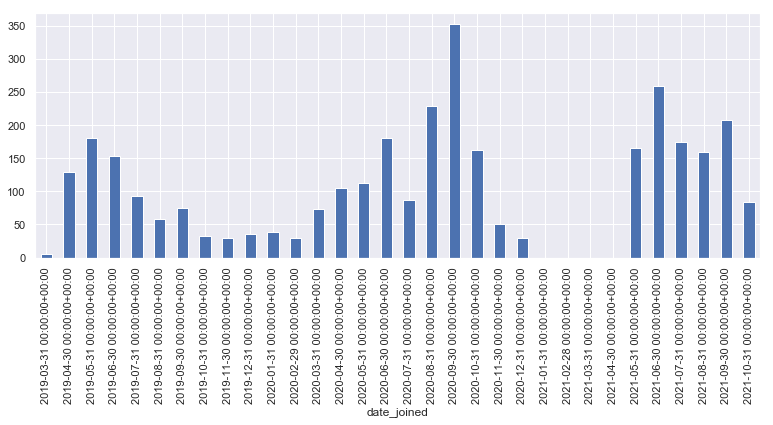

In [54]:
profiles.groupby(pd.Grouper(key='date_joined',freq='m')).count()['id'].plot(kind='bar')

In [73]:
data_transac = data[data.istransaction == 1]

In [ ]:
transition/enquire                          1282
transition/complete                          188
transition/expire-review-period              152
transition/decline                            88
transition/expire                             60
transition/cancel                             47
transition/review-2-by-customer               38
transition/expire-payment                     27
transition/review-1-by-provider               26
transition/review-2-by-provider               24
transition/accept                             23
transition/request-payment                    17
transition/expire-customer-review-period      17
transition/review-1-by-customer               14
transition/expire-provider-review-period      10
transition/request-payment-after-enquiry       6
transition/confirm-payment                     2

# Profile Card

In [97]:
def count_by_name(data):
    column = list(data.columns)[-1]
    output = data.groupby(['id_x']).count().sort_values(by=column,ascending=False)[column]
    return pd.DataFrame(output).reset_index()

In [135]:
activity_per_profile = count_by_name(profiles.merge(data,how='left',left_on = 'id',right_on = 'provider_id')).rename(columns={'day_transition':'count_activity'})

In [136]:
transac_per_profile = count_by_name(profiles.merge(data_transac,how='left',left_on = 'id',right_on = 'provider_id')).rename(columns={'day_transition':'count_transac'})

In [185]:
transac_date_stats = (profiles
                 .merge(data_transac,how='left',left_on = 'id',right_on = 'provider_id')
                 .groupby('id_x')
                 .agg({'lastTransitionedAt': [np.min,np.max]})
                )
transac_date_stats = transac_date_stats.transpose().reset_index().drop(columns = 'level_0').transpose()
transac_date_stats.columns = transac_date_stats.iloc[0]
transac_date_stats = transac_date_stats.drop(index='level_1').reset_index()

In [186]:
profile_stats = (profiles
                 .merge(activity_per_profile,how='left',left_on = 'id',right_on = 'id_x')
                 .merge(transac_per_profile,how='left',left_on = 'id',right_on = 'id_x')
                 .merge(transac_date_stats,how='left',left_on = 'id',right_on = 'index')
                )

In [187]:
profile_stats.columns

Index(['password', 'last_login', 'id', 'first_name', 'last_name',
       'date_joined', 'is_staff', 'is_superuser', 'is_active', 'avatar', 'bio',
       'email', 'emailVerified', 'phoneNumber', 'wishlist', 'stripeAccount_id',
       'id_x_x', 'count_activity', 'id_x_y', 'count_transac', 'index', 'amin',
       'amax'],
      dtype='object')

In [191]:
profile_stats_light = profile_stats[['first_name','last_name','date_joined','count_activity','count_transac','amin','amax']]

In [207]:
profile_stats_light.amin = pd.to_datetime(profile_stats_light.amin).dt.date
profile_stats_light.amax = pd.to_datetime(profile_stats_light.amax).dt.date
profile_stats_light.date_joined = pd.to_datetime(profile_stats_light.date_joined).dt.date

C:\Users\eric_\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [222]:
profile_stats_light['time_to_transac'] = (profile_stats_light.amin - profile_stats_light.date_joined).dt.days
profile_stats_light['time_btw_transac'] = (profile_stats_light.amax - profile_stats_light.amin).dt.days

C:\Users\eric_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\eric_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
profile_stats_light.to_excel("")

,first_name,last_name,date_joined,count_activity,count_transac,amin,amax,time_to_transac,time_btw_transac
0,Tiphaine,Clouet,2021-06-08,0,0,NaT,NaT,NaN,NaN
1,Marie,Chenevier,2021-08-08,0,0,NaT,NaT,NaN,NaN
2,Camille,Kress,2021-07-07,0,0,NaT,NaT,NaN,NaN
3,Thérèse,Castaignède,2021-07-07,0,0,NaT,NaT,NaN,NaN
4,Pauline,Vivier,2021-06-29,0,0,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3283,Philippine,Mouton,2021-06-03,0,0,NaT,NaT,NaN,NaN
3284,Jeanne,Cadiou,2021-09-13,0,0,NaT,NaT,NaN,NaN
3285,Marie-Prisca,Denis,2021-06-21,0,0,NaT,NaT,NaN,NaN
3286,Anne-Laure,Gindre,2021-08-24,0,0,NaT,NaT,NaN,NaN


In [232]:
col_proportion(profile_stats_light,'count_activity')

,count_activity,proportion
0,2895,88.0%
1,122,3.7%
2,74,2.3%
3,37,1.1%
4,32,1.0%
5,23,0.7%
6,20,0.6%
8,18,0.5%
7,17,0.5%
9,6,0.2%


In [234]:
col_proportion(profile_stats_light,'count_transac')

,count_transac,proportion
0,3106,94.5%
1,105,3.2%
2,35,1.1%
3,14,0.4%
4,10,0.3%
5,4,0.1%
7,3,0.1%
6,3,0.1%
45,1,0.0%
41,1,0.0%


In [235]:
col_proportion(profile_stats_light[profile_stats_light.count_activity != 0],'count_transac')

,count_transac,proportion
0,211,53.7%
1,105,26.7%
2,35,8.9%
3,14,3.6%
4,10,2.5%
5,4,1.0%
7,3,0.8%
6,3,0.8%
45,1,0.3%
41,1,0.3%


In [237]:
col_proportion(profile_stats_light[profile_stats_light.count_transac == 0],'count_activity')

,count_activity,proportion
0,2895,93.2%
1,106,3.4%
2,49,1.6%
3,19,0.6%
4,11,0.4%
5,9,0.3%
6,7,0.2%
7,5,0.2%
8,4,0.1%
22,1,0.0%


In [246]:
col_proportion(profile_stats_light,'time_to_transac',max_occurences=1000)

,time_to_transac,proportion
31.0,4,2.2%
35.0,4,2.2%
107.0,3,1.6%
43.0,3,1.6%
89.0,3,1.6%
36.0,3,1.6%
34.0,3,1.6%
29.0,2,1.1%
41.0,2,1.1%
481.0,2,1.1%


In [245]:
profile_stats_light.date_joined.dt.month

AttributeError: Can only use .dt accessor with datetimelike values

In [239]:
profile_stats_light['month_joined'] = profile_stats_light.date_joined.dt.month
profile_stats_light['year_joined'] = profile_stats_light.date_joined.dt.year

AttributeError: 'Series' object has no attribute 'month'